the k_space_signal.mat file was obtained by averaging the raw k-space signal over the 526 points on each ring, such that I get a "signal average" function as (ring, k_z position). This allows me to determine where most of the signal is.

In [1]:
import sys
import os

sys.path.append('../../../scripts')
sys.path.append('../../../models')

os.environ["CUDA_VISIBLE_DEVICES"]= '2' #, this way I would choose GPU 3 to do the work

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]= '0' #, this way I would choose GPU 3 to do the work

import torch
import numpy as np
import time
import h5py
import matplotlib.pyplot as plt
from scipy.ndimage import zoom # for compressing images / only for testing purposes to speed up NN training
from scipy.fft import fft2, fftshift
from scipy.io import loadmat
from torch.utils.data import DataLoader, Subset
import torch.optim as optim
import torch.nn as nn
from scipy.io import loadmat

from data_preparation import *
import plotly.graph_objects as gorings

**Reconstruction k-z Positions of Rings**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


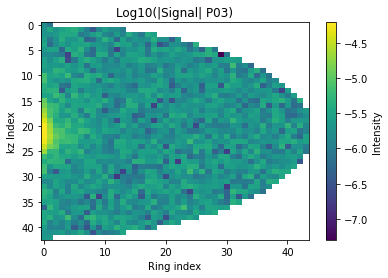

In [2]:
Signal_P03 = np.swapaxes(loadmat('k_space_signal_P03.mat')['result'], 0,1)

# Compute the log10 of the absolute value of Signal
log_signal = np.log10(np.abs(Signal_P03))

# Display the image with appropriate labels and colorbar
plt.imshow(log_signal, aspect='auto', origin='upper')
plt.ylabel('kz Index')
plt.xlabel('Ring index')
plt.title('Log10(|Signal| P03)')
plt.colorbar(label='Intensity')
plt.show()

In [15]:
total = np.sum(np.abs(Signal_P03))


# Flatten the array to 1D
flat_arr = Signal_P03.flatten()

# Find indices of the 70 largest elements by absolute value
indices = np.argpartition(np.abs(flat_arr), -700)[-700:]

# Extract the corresponding elements
largest_elements = np.abs(flat_arr[indices])

frac = np.sum(largest_elements)

print(frac/total)

0.7298988979348315


In [10]:
total.shape

()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


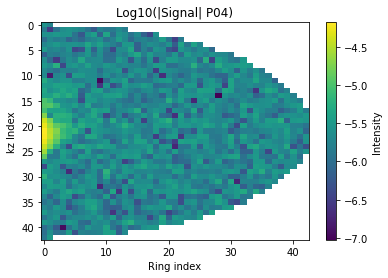

In [3]:
Signal_P04 = np.swapaxes(loadmat('k_space_signal_P04.mat')['result'], 0,1)

# Compute the log10 of the absolute value of Signal
log_signal = np.log10(np.abs(Signal_P04))

# Display the image with appropriate labels and colorbar
plt.imshow(log_signal, aspect='auto', origin='upper')
plt.ylabel('kz Index')
plt.xlabel('Ring index')
plt.title('Log10(|Signal| P04)')
plt.colorbar(label='Intensity')
plt.show()

In [40]:
np.sqrt(np.sum(np.abs(Signal_P03[:,0:3])**2)/np.sum(np.abs(Signal_P03)**2))

0.8492344904381729

In [38]:
np.sqrt(np.sum(np.abs(Signal_P04[:,0:3])**2)/np.sum(np.abs(Signal_P04)**2))

0.8654345365764057

In [42]:
np.sqrt(np.sum(np.abs(Signal_P04[18:24,:])**2)/np.sum(np.abs(Signal_P04)**2))

0.8329027904708771